# Modelling

## Library imports

In [51]:
import pandas as pd
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn import tree

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [5]:
X = pd.read_csv("large_cleaned.csv", index_col = 0)

In [6]:
X.columns

Index(['category', 'turnover', 'transaction_count', 'io_ratio', 'age',
       'nationality', 'is_pep', 'inactive_days_average', 'inactive_days_max',
       'n_of_accounts', 'distinct_counterparties', 'channel_risk',
       'atm_withdrawal', 'atm_deposit', 'aml_risk_score', 'aml_risk_ranking',
       'country_name', 'cpi_risk_score', 'cpi_risk_ranking',
       'atm_withdrawal_norm', 'atm_deposit_norm', 'transaction_avg',
       'turnover_log', 'atm_withdrawal_log', 'atm_deposit_log',
       'transaction_count_log', 'distinct_counterparties_log',
       'atm_withdrawal_norm_log', 'atm_deposit_norm_log',
       'inactive_days_average_log', 'new_category', 'category_name',
       'no_atm_deposit', 'no_atm_withdrawal'],
      dtype='object')

In [7]:
X.drop(['category', 'turnover', 'transaction_count', 'nationality', 'is_pep', 
        'n_of_accounts', 'category_name', 'inactive_days_average', 'inactive_days_max',
       'distinct_counterparties', 'atm_withdrawal', 'atm_deposit', 'transaction_avg', 
        'cpi_risk_ranking', 'aml_risk_ranking', 'country_name'], axis = 1, inplace = True)

In [8]:
X.columns

Index(['io_ratio', 'age', 'channel_risk', 'aml_risk_score', 'cpi_risk_score',
       'atm_withdrawal_norm', 'atm_deposit_norm', 'turnover_log',
       'atm_withdrawal_log', 'atm_deposit_log', 'transaction_count_log',
       'distinct_counterparties_log', 'atm_withdrawal_norm_log',
       'atm_deposit_norm_log', 'inactive_days_average_log', 'new_category',
       'no_atm_deposit', 'no_atm_withdrawal'],
      dtype='object')

In [9]:
X.fillna(0, inplace = True)

In [13]:
X.head()

,io_ratio,age,channel_risk,aml_risk_score,cpi_risk_score,atm_withdrawal_norm,atm_deposit_norm,turnover_log,atm_withdrawal_log,atm_deposit_log,transaction_count_log,distinct_counterparties_log,atm_withdrawal_norm_log,atm_deposit_norm_log,inactive_days_average_log,new_category,no_atm_deposit,no_atm_withdrawal
cif,,,,,,,,,,,,,,,,,,
90000000,0.304000,40,0.254742,0.00,53.0,0.008899,0.009931,5.337807,3.287387,3.335014,2.100371,0.602060,0.003848,0.004292,0.424882,0,0,0
90000001,0.250000,17,0.393174,5.11,73.0,0.086381,0.015567,1.766562,0.775246,0.277349,1.322219,0.845098,0.035982,0.006709,0.920123,0,0,0
90000002,0.000000,66,0.422991,0.00,53.0,0.000000,0.000157,6.165861,0.000000,2.362357,0.301030,0.301030,0.000000,0.000068,1.399328,0,0,1
90000003,0.239130,43,0.296019,5.11,73.0,0.100324,0.007263,5.633308,4.634722,3.494564,1.672098,1.255273,0.041521,0.003143,0.688420,0,0,0
90000004,0.365079,0,0.067511,0.00,0.0,0.019435,0.006459,7.970143,6.258719,5.780337,1.806180,0.301030,0.008359,0.002796,0.576341,2,0,0


In [14]:
X.shape

(999232, 18)

In [15]:
y = pd.read_csv('jeopardy.csv', index_col = 0)

In [16]:
df = pd.merge(X, y, left_index = True, right_index = True)

In [17]:
df.head()

,io_ratio,age,channel_risk,aml_risk_score,cpi_risk_score,atm_withdrawal_norm,atm_deposit_norm,turnover_log,atm_withdrawal_log,atm_deposit_log,transaction_count_log,distinct_counterparties_log,atm_withdrawal_norm_log,atm_deposit_norm_log,inactive_days_average_log,new_category,no_atm_deposit,no_atm_withdrawal,suspicious
cif,,,,,,,,,,,,,,,,,,,
90000000,0.304000,40,0.254742,0.00,53.0,0.008899,0.009931,5.337807,3.287387,3.335014,2.100371,0.602060,0.003848,0.004292,0.424882,0,0,0,0
90000001,0.250000,17,0.393174,5.11,73.0,0.086381,0.015567,1.766562,0.775246,0.277349,1.322219,0.845098,0.035982,0.006709,0.920123,0,0,0,0
90000002,0.000000,66,0.422991,0.00,53.0,0.000000,0.000157,6.165861,0.000000,2.362357,0.301030,0.301030,0.000000,0.000068,1.399328,0,0,1,0
90000003,0.239130,43,0.296019,5.11,73.0,0.100324,0.007263,5.633308,4.634722,3.494564,1.672098,1.255273,0.041521,0.003143,0.688420,0,0,0,0
90000004,0.365079,0,0.067511,0.00,0.0,0.019435,0.006459,7.970143,6.258719,5.780337,1.806180,0.301030,0.008359,0.002796,0.576341,2,0,0,0


In [18]:
data_0 = df[df['new_category'] == 0]
data_0.drop(['new_category'], axis=1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
data_1 = df[df['new_category'] == 1]
data_1.drop(['new_category'], axis=1, inplace = True)

In [20]:
data_2 = df[df['new_category'] == 2]
data_2.drop(['new_category'], axis=1, inplace = True)

In [21]:
data_3 = df[df['new_category'] == 3]
data_3.drop(['new_category'], axis=1, inplace = True)

## Check class balance

In [22]:
# all dataset
df['suspicious'].value_counts()

0    982094
1     17138
Name: suspicious, dtype: int64

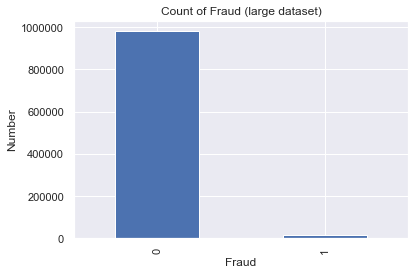

In [23]:
sns.set()
df['suspicious'].value_counts().plot(kind = 'bar')
plt.xlabel('Fraud')
plt.ylabel('Number')
plt.title('Count of Fraud (large dataset)')
None

In [24]:
# normal individuals
data_0['suspicious'].value_counts()

0    678286
1     13930
Name: suspicious, dtype: int64

In [25]:
# companies
data_1['suspicious'].value_counts()

0    197855
1      2080
Name: suspicious, dtype: int64

In [26]:
# other institutions
data_2['suspicious'].value_counts()

0    99166
1     1069
Name: suspicious, dtype: int64

In [27]:
# pep
data_3['suspicious'].value_counts()

0    6787
1      59
Name: suspicious, dtype: int64

## train-test split

In [28]:
y = df['suspicious']

df.drop(columns = 'suspicious', inplace = True)
X = df

In [29]:
y_0 = data_0['suspicious']

data_0.drop(columns = 'suspicious', inplace = True)
X_0 = data_0

In [30]:
y_1 = data_1['suspicious']

data_1.drop(columns = 'suspicious', inplace = True)
X_1 = data_1

In [31]:
y_2 = data_2['suspicious']

data_2.drop(columns = 'suspicious', inplace = True)
X_2 = data_2

In [32]:
y_3 = data_3['suspicious']

data_3.drop(columns = 'suspicious', inplace = True)
X_3 = data_3

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.3, random_state=42)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=42)

## Upsampling on training set

In [34]:
def upsampling_train(X_train, y_train):
    
    # seperate minority and majority class
    df_majority_X = X_train[y_train == 0]
    df_minority_X = X_train[y_train == 1]
    
    df_majority_y = y_train[y_train == 0]
    df_minority_y = y_train[y_train == 1]
    
    # minority and majority df
    df_min = pd.merge(df_majority_X, df_majority_y, left_index = True, right_index = True)
    df_maj = pd.merge(df_minority_X, df_minority_y, left_index = True, right_index = True)

    # get the upsample number
    upsample_number = y_train.value_counts()[0]

    # upsample minority class
    df_minority_upsampled = resample(df_min,
                                    replace = True,
                                    n_samples = upsample_number,
                                    random_state = 123)

    # combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_maj, df_minority_upsampled])

    df_shuffled = shuffle(df_upsampled, random_state = 37)

    df_upsampled_X_shuffled = df_shuffled.iloc[:,:-1]
    df_upsampled_y_shuffled = df_shuffled.iloc[:,-1]
    
    return df_upsampled_X_shuffled, df_upsampled_y_shuffled 

In [35]:
X_train_up, y_train_up = upsampling_train(X_train, y_train)
X_train_0_up, y_train_0_up = upsampling_train(X_train_0, y_train_0)
X_train_1_up, y_train_1_up = upsampling_train(X_train_1, y_train_1)
X_train_2_up, y_train_2_up = upsampling_train(X_train_2, y_train_2)
X_train_3_up, y_train_3_up = upsampling_train(X_train_3, y_train_3)

## Models

### Architecture and parameters

In [36]:
dectree = DecisionTreeClassifier(random_state = 12)
svm = SVC (C = 1, gamma = 'scale', random_state = 12, probability=True)

## Crossvalidation on training set

In [38]:
cv_choice = 5

In [38]:
scores_tree = cross_val_score(dectree, X_train_up, y_train_up, scoring='f1_micro', cv = cv_choice)
print('Cross Validated Scores', sum(scores_tree)/cv_choice)

Cross Validated Scores 0.9763546842362885


In [ ]:
scores_svm = cross_val_score(svm, X_train_up, y_train_up, scoring='f1_micro', cv = cv_choice)
print('Cross Validated Scores', sum(scores_svm)/cv_choice)

### Data filtered by category 0 (normal individuals)

In [39]:
scores_tree_0 = cross_val_score(dectree, X_train_0_up, y_train_0_up, scoring='f1_micro', cv = cv_choice)
print('Cross Validated Scores', sum(scores_tree_0)/cv_choice)

Cross Validated Scores 0.9723310892878599


In [ ]:
scores_svm_0 = cross_val_score(svm, X_train_0_up, y_train_0_up, scoring='f1_micro', cv = cv_choice)
print('Cross Validated Scores', sum(scores_svm_0)/cv_choice)

### Data filtered by category 1 (companies)

In [40]:
scores_tree_1 = cross_val_score(dectree, X_train_1_up, y_train_1_up, scoring='f1_micro', cv = cv_choice)
print('Cross Validated Scores', sum(scores_tree_1)/cv_choice)

Cross Validated Scores 0.9865098490482236


In [ ]:
scores_svm_1 = cross_val_score(svm, X_train_1_up, y_train_1_up, scoring='f1_micro', cv = cv_choice)
print('Cross Validated Scores', sum(scores_svm_1)/cv_choice)

### Data filtered by category 2 (other institutions)

In [41]:
scores_tree_2 = cross_val_score(dectree, X_train_2_up, y_train_2_up, scoring='f1_micro', cv = cv_choice)
print('Cross Validated Scores', sum(scores_tree_2)/cv_choice)

Cross Validated Scores 0.9855766595452111


In [55]:
scores_svm_2 = cross_val_score(svm, X_train_2_up, y_train_2_up, scoring='f1_micro', cv = cv_choice)
print('Cross Validated Scores', sum(scores_svm_2)/cv_choice)

Cross Validated Scores 0.989025711182007


### Data filtered by category 3 (individuals, is_pep = 1)

In [42]:
scores_tree_3 = cross_val_score(dectree, X_train_3_up, y_train_3_up, scoring='f1_micro', cv = cv_choice)
print('Cross Validated Scores', sum(scores_tree_3)/cv_choice)

Cross Validated Scores 0.9860188328442995


In [53]:
scores_svm_3 = cross_val_score(svm, X_train_3_up, y_train_3_up, scoring='f1_micro', cv = cv_choice)
print('Cross Validated Scores', sum(scores_svm_3)/cv_choice)

Cross Validated Scores 0.9908183287830458


## Test on imbalanced test data

In [43]:
def final_test(X_train, y_train, X_test, y_test, model):
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))

### All data

In [44]:
final_test(X_train_up, y_train_up, X_test, y_test, dectree)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    294675
           1       0.15      0.25      0.19      5095

    accuracy                           0.96    299770
   macro avg       0.57      0.61      0.58    299770
weighted avg       0.97      0.96      0.97    299770



In [ ]:
final_test(X_train_up, y_train_up, X_test, y_test, svm)

### Data filtered by category 0 (normal individuals)

In [45]:
final_test(X_train_0_up, y_train_0_up, X_test_0, y_test_0, dectree)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98    203468
           1       0.15      0.25      0.18      4197

    accuracy                           0.96    207665
   macro avg       0.57      0.61      0.58    207665
weighted avg       0.97      0.96      0.96    207665



In [ ]:
final_test(X_train_0_up, y_train_0_up, X_test_0, y_test_0, svm)

### Data filtered by category 1 (companies)

In [47]:
final_test(X_train_1_up, y_train_1_up, X_test_1, y_test_1, dectree)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     59356
           1       0.15      0.24      0.19       625

    accuracy                           0.98     59981
   macro avg       0.57      0.61      0.59     59981
weighted avg       0.98      0.98      0.98     59981



In [ ]:
final_test(X_train_1_up, y_train_1_up, X_test_1, y_test_1, svm)

### Data filtered by category 2 (other institutions)

In [48]:
final_test(X_train_2_up, y_train_2_up, X_test_2, y_test_2, dectree)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29772
           1       0.16      0.26      0.19       299

    accuracy                           0.98     30071
   macro avg       0.57      0.62      0.59     30071
weighted avg       0.98      0.98      0.98     30071



In [56]:
final_test(X_train_2_up, y_train_2_up, X_test_2, y_test_2, svm)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     29772
           1       0.00      0.00      0.00       299

    accuracy                           0.99     30071
   macro avg       0.50      0.50      0.50     30071
weighted avg       0.98      0.99      0.99     30071



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Data filtered by category 3 (individuals, is_pep = 1)

In [49]:
final_test(X_train_3_up, y_train_3_up, X_test_3, y_test_3, dectree)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2039
           1       0.05      0.13      0.07        15

    accuracy                           0.97      2054
   macro avg       0.52      0.56      0.53      2054
weighted avg       0.99      0.97      0.98      2054



In [54]:
final_test(X_train_3_up, y_train_3_up, X_test_3, y_test_3, svm)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2039
           1       0.00      0.00      0.00        15

    accuracy                           0.99      2054
   macro avg       0.50      0.50      0.50      2054
weighted avg       0.99      0.99      0.99      2054



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Plotting example decision tree for category 3

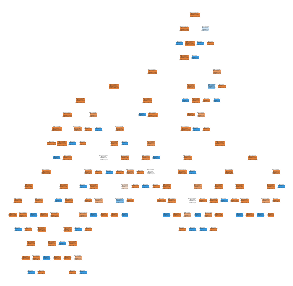

<Figure size 432x288 with 0 Axes>

In [52]:
plt.figure(figsize = (5,5))
tree.plot_tree(dectree.fit(X_train_3,y_train_3), filled=True)
plt.show()
plt.savefig('tree_cat_3.png')
None